In [35]:
import pandas as pd
movies = pd.read_csv('C:\\Users\\bagchi\\Favorites\\Downloads\\tmdb_movies_data.csv')

In [24]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

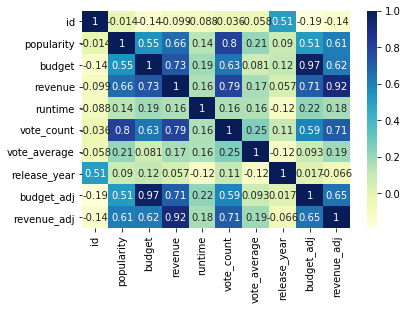

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = movies.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

# Number of movies released each year from 1960 to 2015

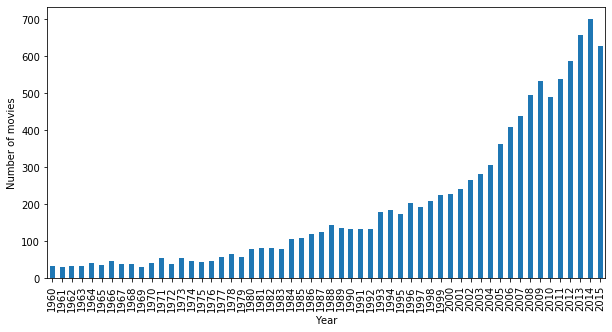

<Figure size 5760x1440 with 0 Axes>

In [11]:
movies_by_year = movies.groupby('release_year')['original_title'].count()
movies_by_year.plot(kind='bar', figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.figure(figsize=(80, 20))
plt.show()

In [40]:
movies['budget_adj'].corr(movies['revenue_adj'], method='pearson')

0.6466074410661403

# Top 10 most successful movies 

In [54]:
profitable_movies = movies[movies['revenue_adj'] > movies['budget_adj']]

# Select the movie titles and print them
movie_titles = profitable_movies['original_title']
release_year = profitable_movies['release_year']
profits = profitable_movies['revenue_adj'] - profitable_movies['budget_adj']

data = {'movie_titles': movie_titles, 'profits': profits, 'release_year': release_year}
df = pd.DataFrame(data)
df = df.sort_values('profits', ascending=False)
print(df.head(10))

                         movie_titles       profits  release_year
1329                        Star Wars  2.750137e+09          1977
1386                           Avatar  2.586237e+09          2009
5231                          Titanic  2.234714e+09          1997
10594                    The Exorcist  2.128036e+09          1973
9806                             Jaws  1.878643e+09          1975
8889       E.T. the Extra-Terrestrial  1.767968e+09          1982
3        Star Wars: The Force Awakens  1.718723e+09          2015
8094                          The Net  1.551568e+09          1995
10110  One Hundred and One Dalmatians  1.545635e+09          1961
7309          The Empire Strikes Back  1.376998e+09          1980
